In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_terrorsim =  pd.read_csv("/content/globalterrorism.csv", encoding='latin-1')

In [ ]:
data_terrorsim.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
data_terrorsim.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
data_terrorsim.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
# taking the important data only
data_terrorsim=data_terrorsim[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [ ]:
data_terrorsim.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:
# checking null values
data_terrorsim.isnull().sum()

Year              0
Month             0
Day               0
Country           0
state            10
Region            0
city              0
latitude         48
longitude        48
AttackType        0
Killed          305
Wounded        1062
Target           47
Summary        2188
Group             0
Target_type       0
Weapon_type       0
Motive         2449
dtype: int64

In [ ]:
data_terrorsim.info

<bound method DataFrame.info of       Year  Month  Day             Country       state  \
0     1970      7    2  Dominican Republic         NaN   
1     1970      0    0              Mexico     Federal   
2     1970      1    0         Philippines      Tarlac   
3     1970      1    0              Greece      Attica   
4     1970      1    0               Japan     Fukouka   
...    ...    ...  ...                 ...         ...   
2904  1975      3   27               Spain      Biscay   
2905  1975      3   27               Spain    Gipuzcoa   
2906  1975      3   27       United States  California   
2907  1975      3   27       United States  California   
2908  1975      3   27       United States  California   

                           Region           city   latitude   longitude  \
0     Central America & Caribbean  Santo Domingo  18.456792  -69.951164   
1                   North America    Mexico city  19.371887  -99.086624   
2                  Southeast Asia        Unkno

# ***Checking the most attack country, city, region and so on...***

In [ ]:
print("Country with the most attacks:",data_terrorsim['Country'].value_counts().idxmax())
print("City with the most attacks:",data_terrorsim['city'].value_counts().index[1])
print("Region with the most attacks:",data_terrorsim['Region'].value_counts().idxmax())
print("Year with the most attacks:",data_terrorsim['Year'].value_counts().idxmax())
print("Month with the most attacks:",data_terrorsim['Month'].value_counts().idxmax())
print("Group with the most attacks:",data_terrorsim['Group'].value_counts().index[1])
print("Most Attack Types:",data_terrorsim['AttackType'].value_counts().idxmax())


Country with the most attacks: United States
City with the most attacks: New York City
Region with the most attacks: Western Europe
Year with the most attacks: 1970
Month with the most attacks: 3
Group with the most attacks: Irish Republican Army (IRA)
Most Attack Types: Bombing/Explosion


<ipython-input-13-78ea1d7015c3>:3: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only.
  cities = data_terrorsim.state.dropna(False)


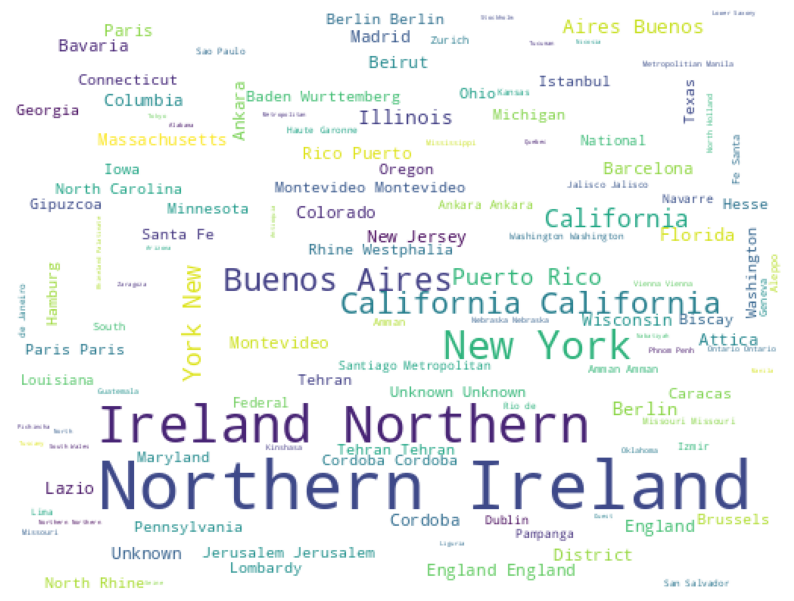

In [ ]:
from wordcloud import WordCloud
from scipy import signal
cities = data_terrorsim.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
data_terrorsim['Year'].value_counts(dropna = False).sort_index()

1970    651
1971    471
1972    568
1973    473
1974    581
1975    165
Name: Year, dtype: int64

# Data Visualisation

Univariate - Year

In [ ]:
data_terrorsim['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975])

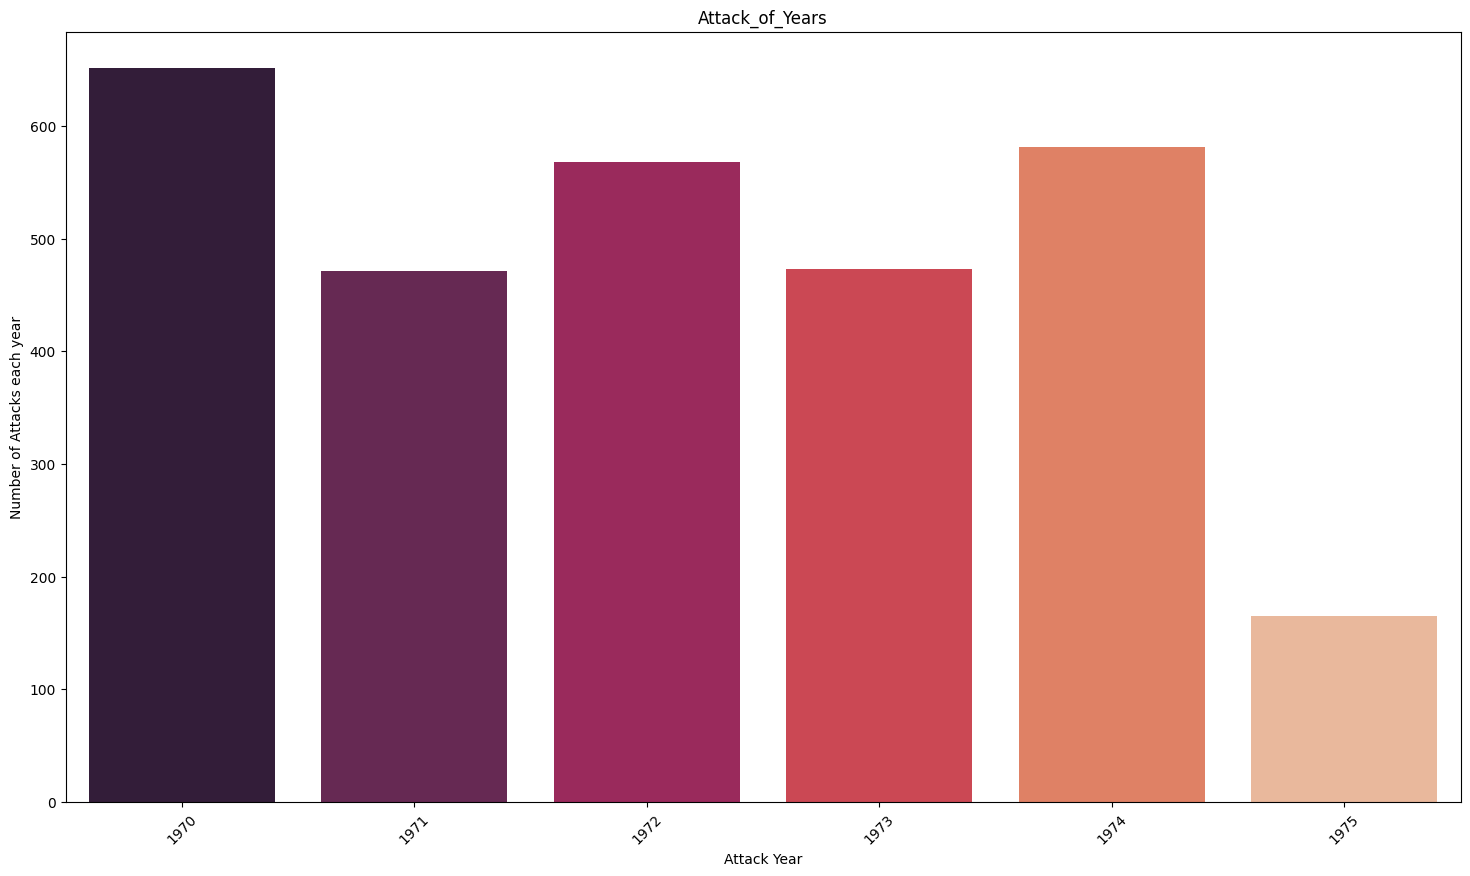

In [ ]:
# Number of Terriost Attack Per Year

x_year = data_terrorsim['Year'].unique()
y_count_years = data_terrorsim['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

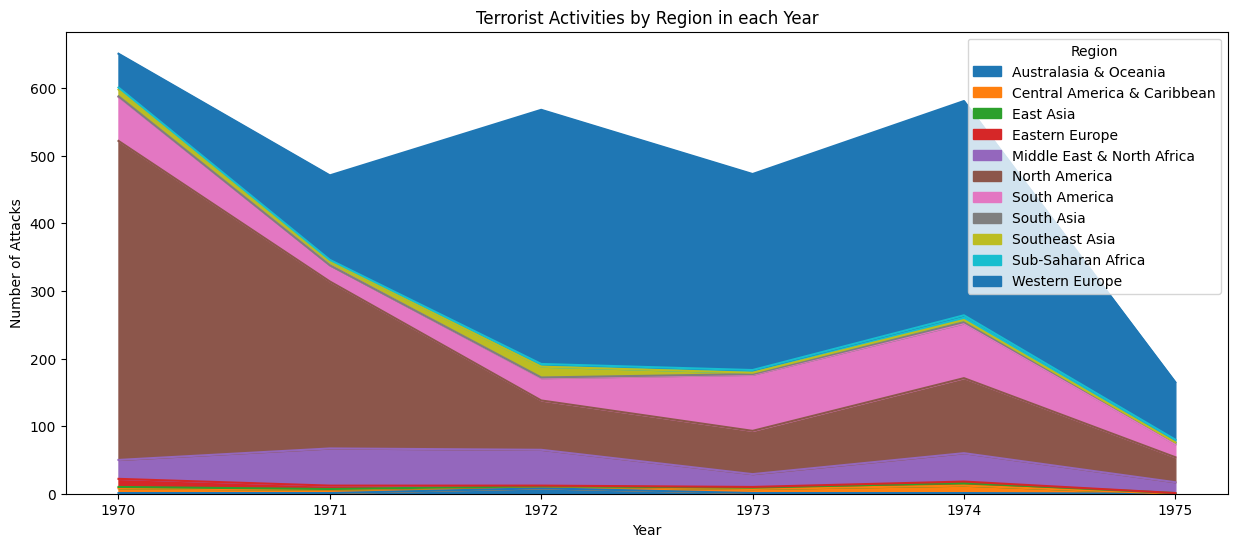

In [ ]:
pd.crosstab(data_terrorsim.Year, data_terrorsim.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [ ]:
data_terrorsim['Wounded'] = data_terrorsim['Wounded'].fillna(0).astype(int)
data_terrorsim['Killed'] = data_terrorsim['Killed'].fillna(0).astype(int)
data_terrorsim['casualities'] = data_terrorsim['Killed'] + data_terrorsim['Wounded']

In [ ]:
data_terrorsim1 = data_terrorsim.sort_values(by='casualities',ascending=False)[:40]

In [ ]:
heat=data_terrorsim1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [ ]:
heat.head()

Year,1970,1971,1972,1973,1974,1975
Country,,,,,,
Czechoslovakia,0.0,0.0,26.0,0.0,0.000000,0.0
France,0.0,0.0,0.0,23.0,36.000000,0.0
Greece,0.0,0.0,0.0,60.0,88.000000,0.0
Ireland,0.0,0.0,0.0,0.0,26.000000,0.0
Israel,0.0,0.0,98.0,20.0,57.333333,0.0


In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

Univariate - Country

In [ ]:
data_terrorsim.Country.value_counts()[:15]

United States         971
United Kingdom        811
Argentina             194
West Germany (FRG)    118
Spain                 108
France                 64
Turkey                 58
Iran                   51
Italy                  49
Uruguay                48
Lebanon                33
Israel                 30
Mexico                 26
Greece                 23
Jordan                 22
Name: Country, dtype: int64

In [33]:
heat1=data_terrorsim1.pivot_table(index='state',columns='Country',values='casualities')
heat1.fillna(0,inplace=True)

In [34]:
heat1.head()

Country,Czechoslovakia,France,Greece,Ireland,Israel,Italy,Kenya,Pakistan,Philippines,South Vietnam,Spain,Switzerland,Taiwan,United Kingdom,United States,West Germany (FRG)
state,,,,,,,,,,,,,,,,
Attica,0.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bouches-du-Rhone,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0
Central,0.0,0.0,0.0,0.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dublin,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Visualisation By Region


In [35]:
region_disgroup = data_terrorsim.groupby(by='Region')

In [36]:
region_group_count = region_disgroup.count()

In [37]:
region_group_count.head()

,Year,Month,Day,Country,state,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
Region,,,,,,,,,,,,,,,,,,
Australasia & Oceania,12,12,12,12,11,12,7,7,12,12,12,12,6,12,12,12,0,12
Central America & Caribbean,32,32,32,32,30,32,30,30,32,32,32,31,0,32,32,32,0,32
East Asia,10,10,10,10,8,10,10,10,10,10,10,10,0,10,10,10,0,10
Eastern Europe,21,21,21,21,21,21,20,20,21,21,21,21,1,21,21,21,1,21
Middle East & North Africa,213,213,213,213,212,213,209,209,213,213,213,212,18,213,213,213,0,213


In [38]:
region_group_count.tail()

,Year,Month,Day,Country,state,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
Region,,,,,,,,,,,,,,,,,,
South America,305,305,305,305,305,305,288,288,305,305,305,298,13,305,305,305,0,305
South Asia,8,8,8,8,8,8,8,8,8,8,8,8,1,8,8,8,1,8
Southeast Asia,37,37,37,37,37,37,34,34,37,37,37,37,6,37,37,37,0,37
Sub-Saharan Africa,24,24,24,24,24,24,18,18,24,24,24,24,4,24,24,24,0,24
Western Europe,1243,1243,1243,1243,1243,1243,1233,1233,1243,1243,1243,1232,25,1243,1243,1243,1,1243


In [39]:
region_group_count.shape

(11, 18)

In [40]:
incident_number = region_group_count.iloc[:, 0]
incident_number = pd.DataFrame(incident_number)

In [41]:
incident_number.rename(columns={'INCIDENT_NUMBER': 'NUMBER'}, inplace=True)
incident_number.head()

,Year
Region,
Australasia & Oceania,12
Central America & Caribbean,32
East Asia,10
Eastern Europe,21
Middle East & North Africa,213


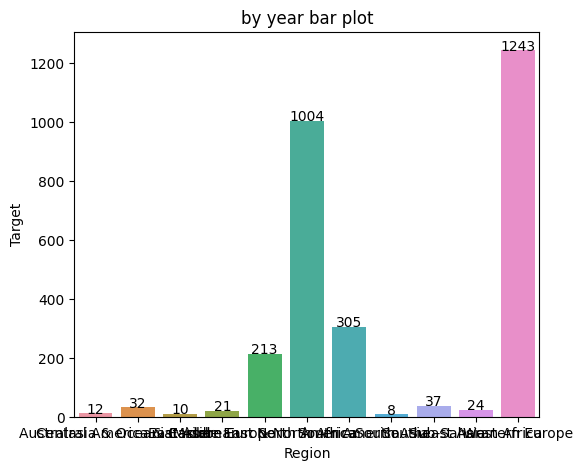

In [59]:
# plotting the crime number against year
plt.figure(figsize=(6,5))
plt.title(r'by year bar plot')
year_plot = sns.barplot(x=incident_number.index, y='Year', data=incident_number)
x = np.arange(incident_number.index.shape[0])
y = np.array(list(incident_number['Year']))
plt.ylabel('Target')
for m,n in zip(x,y):
  plt.text(m, n+0.05, '%d'%n, ha='center')
else:
  pass
year_plot.figure = year_plot.get_figure()
year_plot.figure.savefig('./total_by_year_bar.png')
plt.show()

Visualisation By Month

In [45]:
month_disgroup = data_terrorsim.groupby(by='Month')

In [46]:
month_group_count = month_disgroup.count()

In [47]:
month_group_count.head()

,Year,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
Month,,,,,,,,,,,,,,,,,,
0,6,6,6,6,6,6,5,5,6,6,6,6,0,6,6,6,0,6
1,241,241,241,241,241,241,235,235,241,241,241,236,62,241,241,241,53,241
2,272,272,272,272,272,272,270,270,272,272,272,265,68,272,272,272,51,272
3,330,330,330,327,330,330,324,324,330,330,330,323,81,330,330,330,50,330
4,249,249,249,248,249,249,244,244,249,249,249,242,104,249,249,249,63,249


In [48]:
incident_number_month = month_group_count.iloc[:, 0]
incident_number_month = pd.DataFrame(incident_number_month)

In [54]:
incident_number_month.rename(columns={'INCIDENT_NUMBER': 'Number'}, inplace=True)
incident_number_month.head()

,Year
Month,
0,6
1,241
2,272
3,330
4,249


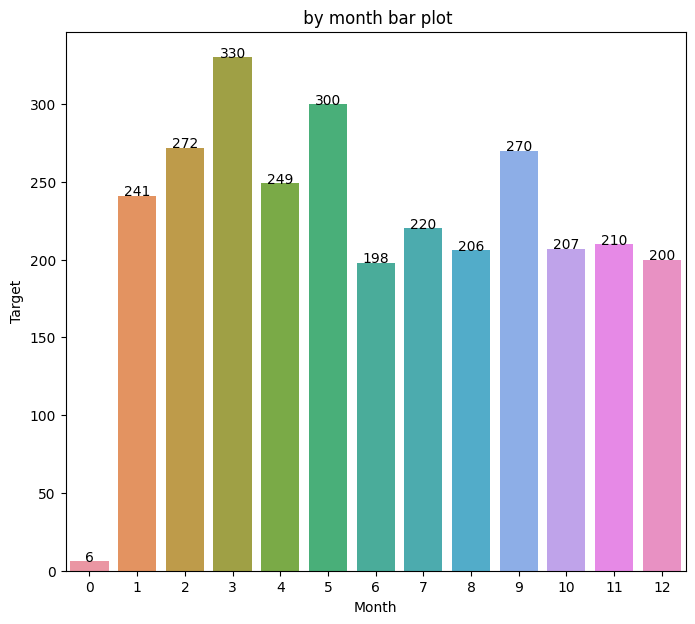

In [58]:
# plotting the crime numbers against year
plt.figure(figsize=(8,7))
plt.title(r' by month bar plot')
month_plot = sns.barplot(x=incident_number_month.index, y='Year', data=incident_number_month)
x = np.arange(incident_number_month.index.shape[0])
y = np.array(list(incident_number_month['Year']))
plt.ylabel('Target')
for m,n in zip(x,y):
  plt.text(m, n+0.05, '%d'%n, ha='center')
else:
  pass
month_plot.figure = month_plot.get_figure()
plt.show()


<ipython-input-60-8f264f24d62c>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



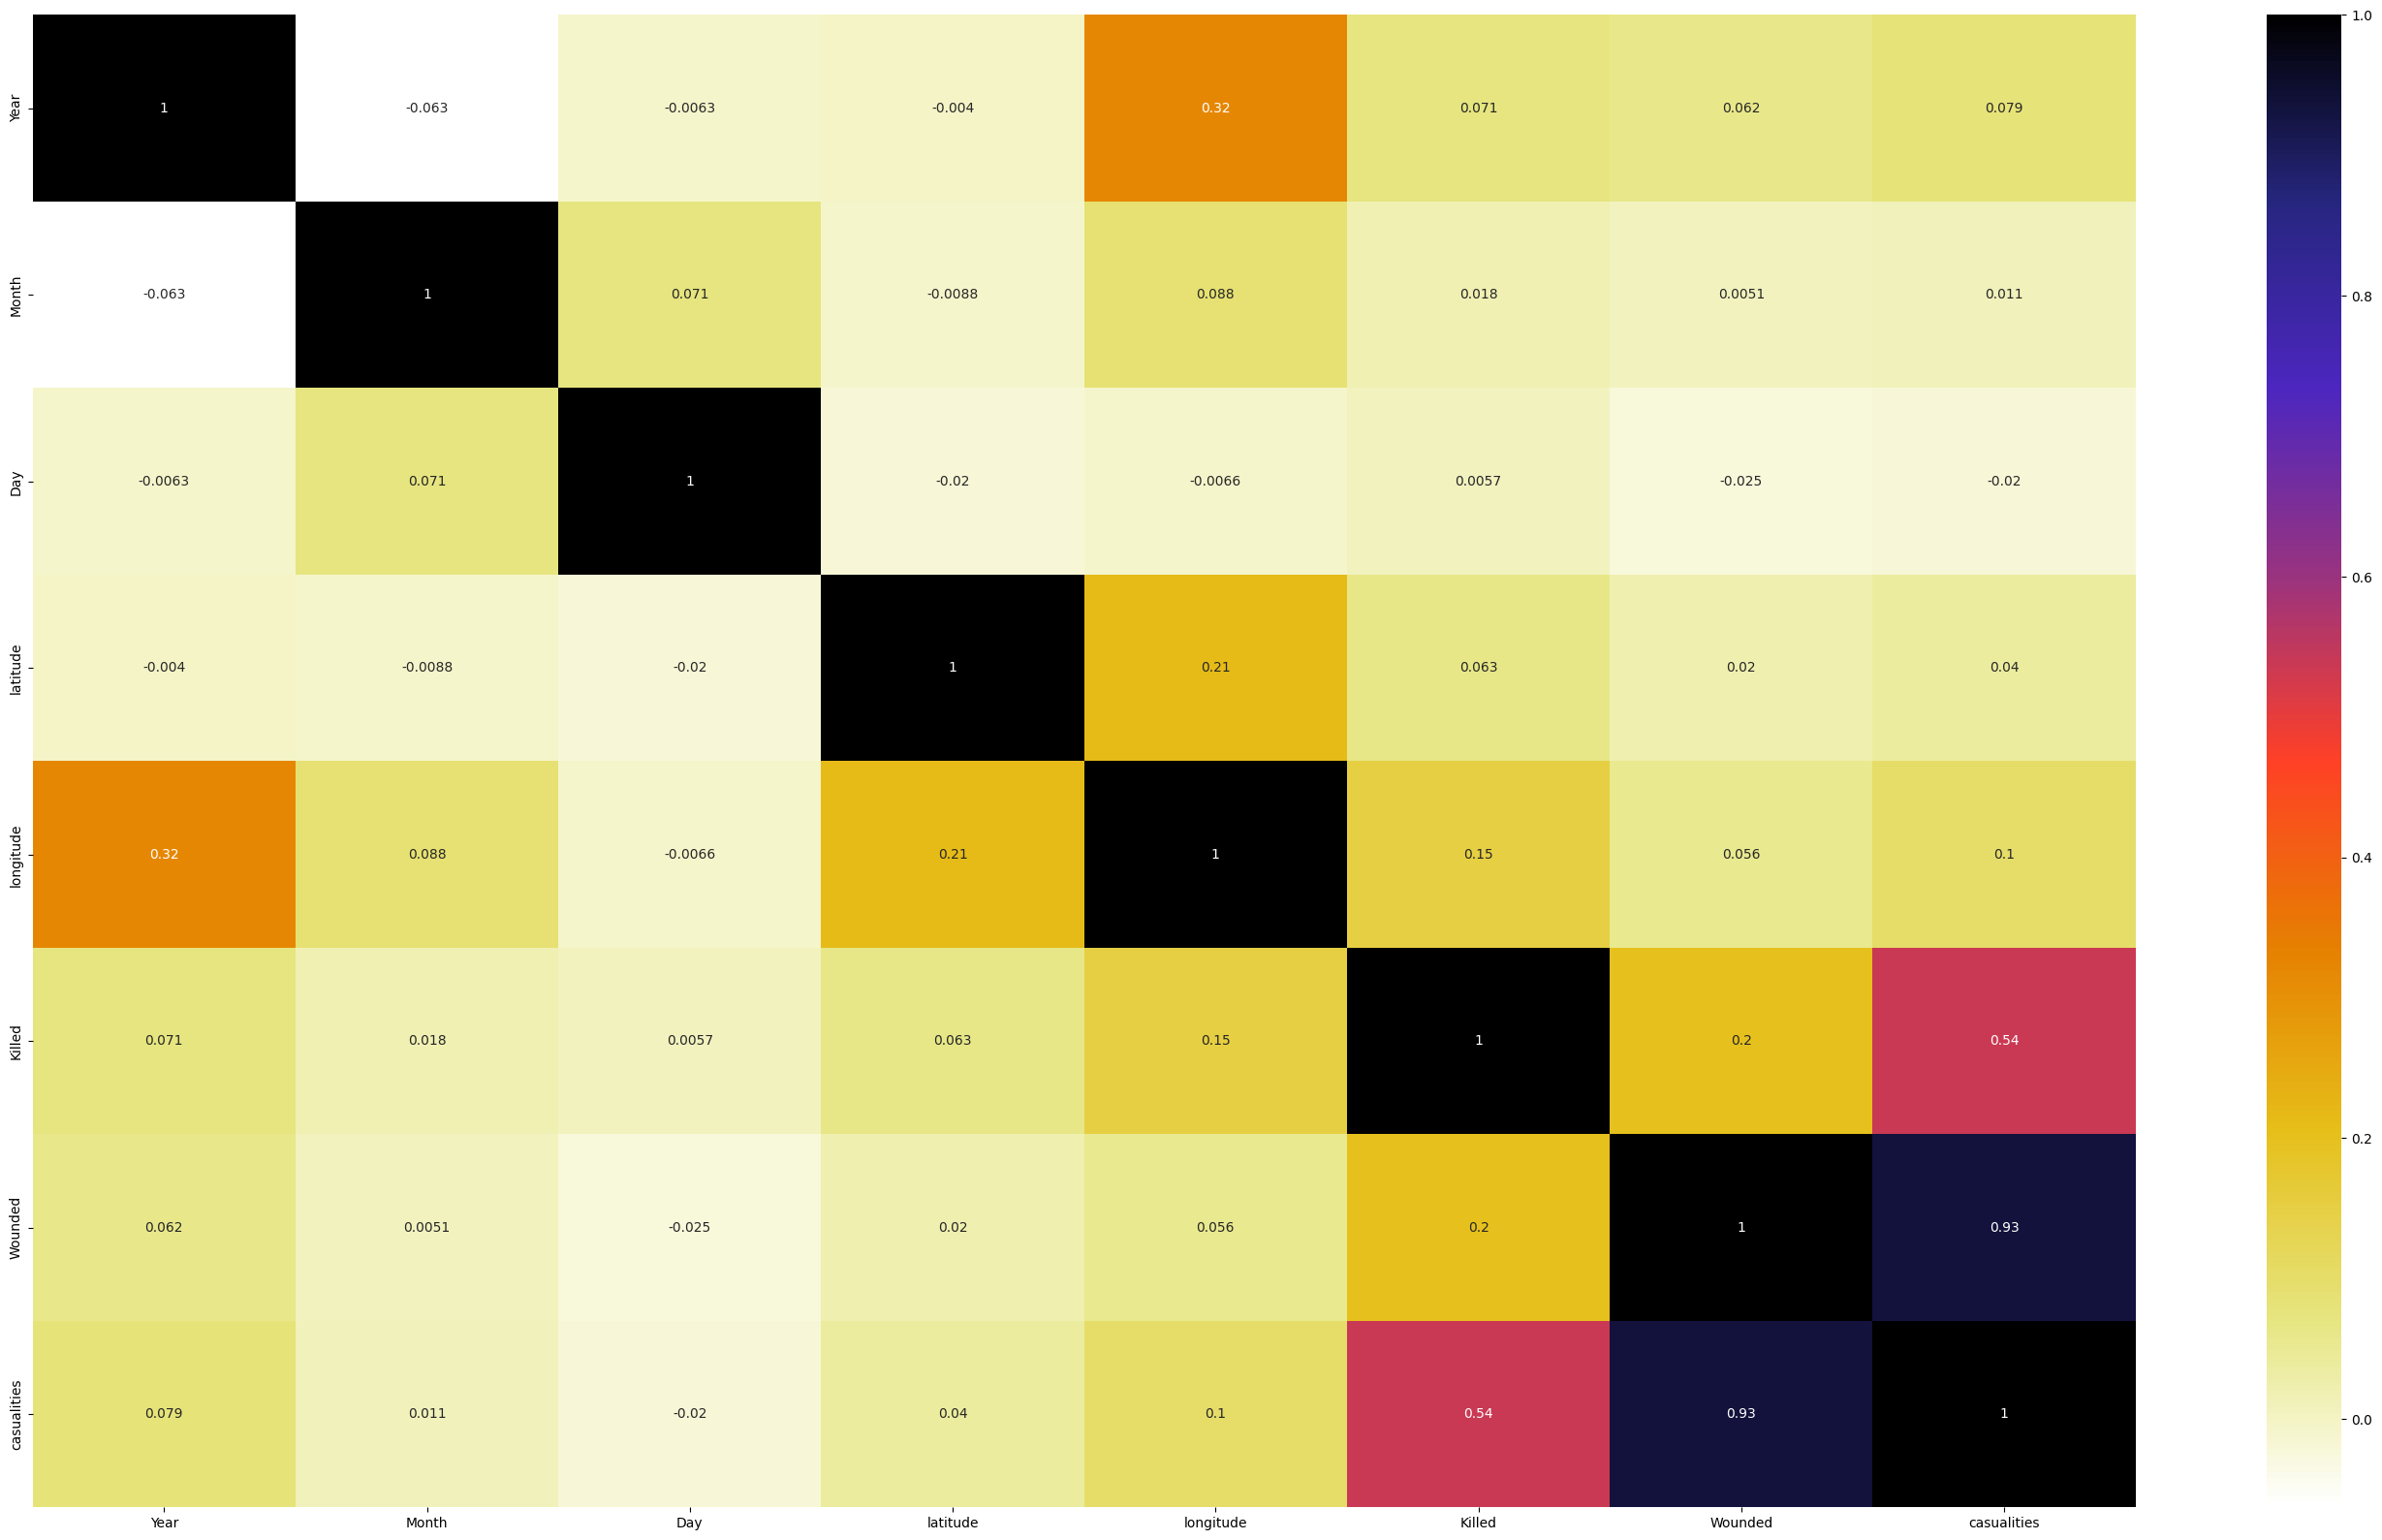

In [60]:
# Heatmap
plt.figure(figsize=(35,20))
cor = data_terrorsim.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()